# PART-A

• DOMAIN: Digital content management


• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.



• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label url link.





• PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

Steps and tasks:


In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AN953317\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib as plt
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np

from tqdm import tqdm

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from langdetect import detect
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

### 1. Read and Analyse Dataset. [5 Marks]


In [4]:
#A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

with ZipFile('blogs.zip', 'r') as zip1:
    zip1.extractall()

In [5]:
blog_df = pd.read_csv("blogs\\blogtext.csv")

In [6]:
blog_df.shape

(681284, 7)

In [7]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


<b>Insights</b>
1. There are total 681284 records 
2. No Null values
3. Id and age are integer ; date is date type
4. Gender, topic and sign are categorical
5. Text is the corpus


In [8]:
len(np.unique(blog_df['topic']))

40

In [9]:
####due to computational problem for large dataset i did stratified sampling of taking 280 samples per topic.

In [10]:
sampleblog_df=blog_df.groupby('topic', group_keys=False).apply(lambda x: x.sample(280))

In [11]:
sampleblog_df['topic'].value_counts()

Accounting                 280
Advertising                280
LawEnforcement-Security    280
Manufacturing              280
Maritime                   280
Marketing                  280
Military                   280
Museums-Libraries          280
Non-Profit                 280
Publishing                 280
RealEstate                 280
Religion                   280
Science                    280
Sports-Recreation          280
Student                    280
Technology                 280
Telecommunications         280
Tourism                    280
Transportation             280
Law                        280
InvestmentBanking          280
Internet                   280
Chemicals                  280
Agriculture                280
Architecture               280
Arts                       280
Automotive                 280
Banking                    280
Biotech                    280
BusinessServices           280
Communications-Media       280
HumanResources             280
Construc

In [12]:
sampleblog_df.sample(5)

,id,gender,age,topic,sign,date,text
582939,919128,male,26,Law,Capricorn,"10,March,2004","I woke up, sort of startled, at 6..."
9674,2844168,female,27,Marketing,Aquarius,"11,July,2004",Wow! What a fun day! I feel s...
675941,4163888,male,17,Sports-Recreation,Taurus,"09,August,2004",i miss rocky. ____________________...
262171,4138246,female,27,Transportation,Aries,"05,August,2004","Well, last night it stormed s..."
458989,3346463,female,14,HumanResources,Scorpio,"05,August,2004","Dance like hypnotized chickens, my ..."


In [13]:
sampleblog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11200 entries, 336301 to 521637
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11200 non-null  int64 
 1   gender  11200 non-null  object
 2   age     11200 non-null  int64 
 3   topic   11200 non-null  object
 4   sign    11200 non-null  object
 5   date    11200 non-null  object
 6   text    11200 non-null  object
dtypes: int64(2), object(5)
memory usage: 700.0+ KB


In [14]:
sampleblog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [15]:
sampleblog_df.gender.value_counts()

male      6287
female    4913
Name: gender, dtype: int64

<b>Insights</b>

Data balance for category Gender is 60:40

<AxesSubplot:xlabel='gender', ylabel='count'>

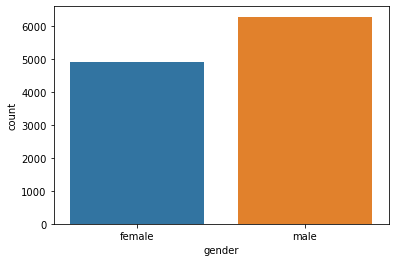

In [16]:
sns.countplot(x='gender',data=sampleblog_df)

<AxesSubplot:xlabel='count', ylabel='topic'>

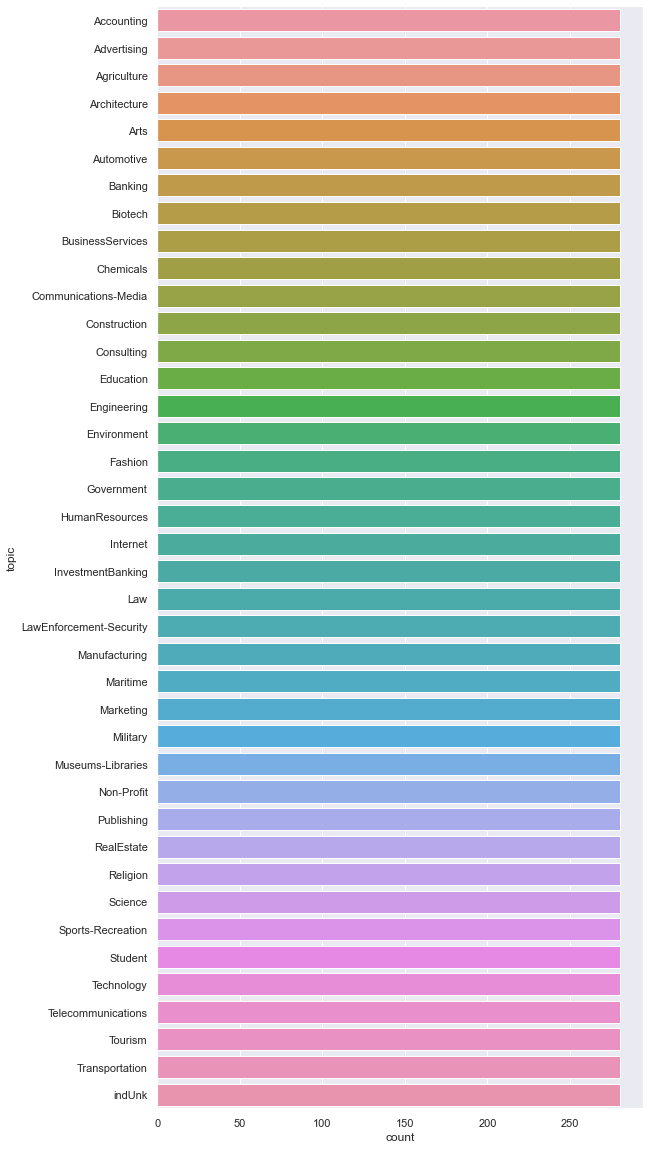

In [17]:

sns.set(rc={'figure.figsize':(8.7,20.27)})
sns.countplot(y='topic',data=sampleblog_df,orient='v')

<b>Insight</b>

With stratified sampling , we took 280 samples under each topic . so we have equal distribution of data over topics.

In [18]:
sampleblog_df.shape

(11200, 7)

### B. Clean the Structured Data [3 Marks]
### i. Missing value analysis and imputation. [1 Marks]


In [19]:
sampleblog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

<b> no missing values</b>

### ii. Eliminate Non-English textual data. [2 Marks]
Hint: Refer ‘langdetect’ library to detect language of the input text

In [20]:
tqdm.pandas(desc="progress-bar")
def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

sampleblog_df = sampleblog_df[sampleblog_df['text'].progress_map(detect_english)]

progress-bar: 100%|██████████████████████████████████████████████████████████████| 11200/11200 [02:46<00:00, 67.40it/s]


In [21]:
sampleblog_df.shape

(10721, 7)

In [22]:
sampleblog_df.text

336301                     Just saw Hottie Toddie and go...
304117                 Ya know, I just have a real probl...
507918           Haven't blogged lately, just haven't fe...
593018           Yep ONLY 89 days until I'm drinking lik...
303902                 Apple has provided me with some f...
                                ...                        
414607           'No you're not.' Kai then entered Rooks...
622397           I saw him again the other day. He was s...
557804              The University of Washington has com...
185380                 I know this has all been gone ove...
521637                  You Are A Total Shopaholic!  You...
Name: text, Length: 10721, dtype: object

### 2. Preprocess unstructured data to make it consumable for model training.
### A. Eliminate All special Characters and Numbers [2 Marks]
 

In [23]:
pattern = r'([^a-zA-Z\s]+?)'
sampleblog_df.text = sampleblog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [24]:
sampleblog_df.text

336301                     Just saw Hottie Toddie and go...
304117                 Ya know I just have a real proble...
507918           Havent blogged lately just havent felt ...
593018           Yep ONLY  days until Im drinking like a...
303902                 Apple has provided me with some f...
                                ...                        
414607           No youre not Kai then entered Rooks roo...
622397           I saw him again the other day He was st...
557804              The University of Washington has com...
185380                 I know this has all been gone ove...
521637                  You Are A Total Shopaholic  You ...
Name: text, Length: 10721, dtype: object

### B. Lowercase all textual data [1 Marks]


In [25]:
sampleblog_df.text = sampleblog_df.text.apply(lambda s: s.lower())

In [26]:
sampleblog_df.text

336301                     just saw hottie toddie and go...
304117                 ya know i just have a real proble...
507918           havent blogged lately just havent felt ...
593018           yep only  days until im drinking like a...
303902                 apple has provided me with some f...
                                ...                        
414607           no youre not kai then entered rooks roo...
622397           i saw him again the other day he was st...
557804              the university of washington has com...
185380                 i know this has all been gone ove...
521637                  you are a total shopaholic  you ...
Name: text, Length: 10721, dtype: object

### C. Remove all Stopwords [1 Marks]


In [27]:
stopword=set(stopwords.words('english'))
sampleblog_df.text = sampleblog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopword]) )

In [28]:
sampleblog_df.text

336301          saw hottie toddie got see butt shot woo hoo
304117    ya know real problem plastic surgery guess cas...
507918    havent blogged lately havent felt like much sa...
593018    yep days im drinking like fish talking like sa...
303902    apple provided free calendar software im prett...
                                ...                        
414607    youre kai entered rooks room quickly changed l...
622397    saw day standing side subway platform kind sta...
557804    university washington completed extensive rese...
185380    know gone fuck redhatss problem charge linux d...
521637    total shopaholic keen eye spotting trends hot ...
Name: text, Length: 10721, dtype: object

### D. Remove all extra white spaces

In [29]:
sampleblog_df.text = sampleblog_df.text.apply(lambda s: s.strip())

In [30]:
sampleblog_df.text

336301          saw hottie toddie got see butt shot woo hoo
304117    ya know real problem plastic surgery guess cas...
507918    havent blogged lately havent felt like much sa...
593018    yep days im drinking like fish talking like sa...
303902    apple provided free calendar software im prett...
                                ...                        
414607    youre kai entered rooks room quickly changed l...
622397    saw day standing side subway platform kind sta...
557804    university washington completed extensive rese...
185380    know gone fuck redhatss problem charge linux d...
521637    total shopaholic keen eye spotting trends hot ...
Name: text, Length: 10721, dtype: object

# 3. Build a base Classification model [8 Marks]
### A. Create dependent and independent variables [2 Marks]
Hint: Treat ‘topic’ as a Target variable.


In [31]:
##As mentioned in project objective : you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.
X= sampleblog_df['text']
Y = sampleblog_df['topic']

In [32]:
sampleblog_df['topic'].value_counts()

Law                        276
Religion                   276
Museums-Libraries          274
Publishing                 274
Internet                   273
Marketing                  273
RealEstate                 273
Government                 272
Education                  272
LawEnforcement-Security    272
Military                   272
Science                    272
Consulting                 271
Student                    271
Maritime                   270
Tourism                    270
Advertising                270
Accounting                 270
Engineering                269
Arts                       269
HumanResources             269
Technology                 268
indUnk                     268
InvestmentBanking          267
Transportation             267
Automotive                 267
Sports-Recreation          266
Environment                266
Communications-Media       266
Non-Profit                 266
BusinessServices           266
Biotech                    265
Fashion 

In [33]:
label_encoder_y= LabelEncoder()  
convertedy= label_encoder_y.fit_transform(Y) 

### B. Split data into train and test. [1 Marks]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,convertedy, random_state=2,test_size = 0.2)

In [35]:
print("X_Train shape",X_train.shape)
print("Y_Train shape",y_train.shape)
print("X_Test shape",X_test.shape)
print("Y_test shape",y_test.shape)

X_Train shape (8576,)
Y_Train shape (8576,)
X_Test shape (2145,)
Y_test shape (2145,)


### C. Vectorize data using any one vectorizer. [2 Marks]


Bag of words

In [36]:
cvect = CountVectorizer(ngram_range=(1,2)) 
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

750483

In [37]:
cvect.get_feature_names()[:5]

C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa', 'aa get', 'aa kk', 'aa lumber', 'aa meeting']

In [38]:
X_train_ct = cvect.transform(X_train)
X_test_ct = cvect.transform(X_test)

### D. Build a base model for Supervised Learning - Classification. [2 Marks]


In [39]:

svmmodel = SVC(probability=True,verbose=True)
svmmodel.fit(X_train_ct, y_train)


y_true, y_pred = y_test, svmmodel.predict(X_test_ct)
pred_prob = svmmodel.predict_proba(X_test_ct)
#Training and testing scores
print("Training score: ",svmmodel.score(X_train_ct,y_train))
print("Testing score: ",svmmodel.score(X_test_ct,y_test))



[LibSVM]Training score:  0.5700792910447762
Testing score:  0.05081585081585081


### E. Clearly print Performance Metrics. [1 Marks]

In [40]:
# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)




# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))


Roc_auc=roc_auc_score(y_true, pred_prob, multi_class='ovr')
print('\ROC AUC:\n', Roc_auc.round(3))


              precision    recall  f1-score   support

           0       0.16      0.22      0.19        58
           1       0.01      0.03      0.02        30
           2       0.12      0.02      0.03        56
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00        57
           5       0.20      0.02      0.03        59
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        61
           8       1.00      0.02      0.04        54
           9       0.04      0.78      0.07        54
          10       0.00      0.00      0.00        53
          11       1.00      0.03      0.06        62
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        49
          14       0.00      0.00      0.00        56
          15       0.33      0.02      0.04        49
          16       0.02      0.04      0.02        49
          17       0.00   

C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Due to computational issue selected only few samples [11k from 6 lakhs] to run thats why score is less

### 4. Improve Performance of model. [14 Marks]
### A. Experiment with other vectorisers. [4 Marks]


In [41]:
X_train1, X_test1, y_train1, y_test1 =train_test_split(X,convertedy, random_state=2,test_size = 0.2)
print('Training utterances: {}'.format(X_train1.shape[0]))
print('Validation utterances: {}'.format(X_test1.shape[0]))

## TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train1)
X_train_tfidf = vectorizer.transform(X_train1)
X_test_tfidf = vectorizer.transform(X_test1)

Training utterances: 8576
Validation utterances: 2145


In [42]:
print(vectorizer.vocabulary_)

len(vectorizer.vocabulary_)

{'im': 29584, 'afraid': 971, 'die': 16020, 'dont': 17136, 'want': 66781, 'happens': 26537, 'woody': 68568, 'allen': 1621, 'report': 51048, 'death': 14841, 'exaggeration': 20082, 'mark': 37184, 'twain': 64046, 'new': 41392, 'york': 69653, 'journal': 32391, 'june': 32560, 'man': 36841, 'runs': 52578, 'away': 4169, 'lives': 35541, 'another': 2475, 'day': 14645, 'housman': 28620, 'shropshire': 55341, 'lad': 33970, 'elevator': 18676, 'sure': 59793, 'push': 48956, 'button': 8460, 'sam': 52911, 'levenson': 34939, 'tell': 60957, 'much': 40080, 'insurance': 30717, 'carry': 9269, 'prudential': 48602, 'say': 53250, 'go': 24699, 'jack': 31609, 'benny': 5670, 'natures': 40864, 'way': 67084, 'telling': 60963, 'slow': 56342, 'terry': 61180, 'pratchett': 47583, 'strata': 58864, 'funny': 23492, 'people': 45544, 'love': 36043, 'dead': 14775, 'youre': 69727, 'made': 36526, 'life': 35090, 'jimi': 32140, 'hendrix': 27294, 'dull': 17856, 'dreary': 17532, 'affair': 914, 'advice': 844, 'nothing': 42257, 'what

70075

### B. Build classifier Models using other algorithms than base model. [4 Marks]



In [43]:
rfmodel1 = RandomForestClassifier()
rfmodel1.fit(X_train_tfidf, y_train1)


y_true, y_pred = y_test1, rfmodel1.predict(X_test_tfidf)

#Training and testing scores
print("Training score: ",rfmodel1.score(X_train_tfidf,y_train1))
print("Testing score: ",rfmodel1.score(X_test_tfidf,y_test1))

Training score:  0.9972014925373134
Testing score:  0.15571095571095572


In [44]:
X_train_tfidf

<8576x70075 sparse matrix of type '<class 'numpy.float64'>'
	with 717797 stored elements in Compressed Sparse Row format>

### C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]





In [45]:
params = { 'max_depth': [3,7,10],'min_samples_leaf': [4, 6],'min_samples_split': [2, 4, 6], 'n_estimators': [100, 200]}

grid = GridSearchCV(RandomForestClassifier(), params ,verbose = 3)
 

grid.fit(X_train_tfidf, y_train1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.079 total time=   1.5s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.080 total time=   1.5s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.069 total time=   1.5s
[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.064 total time=   1.5s
[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.091 total time=   1.6s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.101 total time=   2.4s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.098 total time=   2.9s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.089 total time=   2.9s
[C

[CV 1/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.101 total time=   3.0s
[CV 2/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.108 total time=   2.8s
[CV 3/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.096 total time=   3.3s
[CV 4/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.076 total time=   3.0s
[CV 5/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.110 total time=   2.9s
[CV 1/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.106 total time=   6.0s
[CV 2/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.117 total time=   6.0s
[CV 3/5] END max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.100 total time=   5.6s
[CV 4/5] END max_depth=7, min_samples_leaf=4, min_samples_split=

[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.111 total time=   4.1s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.111 total time=   4.1s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.111 total time=   4.0s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.094 total time=   4.2s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.118 total time=   4.0s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.109 total time=   8.3s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.122 total time=   8.4s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.117 total time=   8.5s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_sampl

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 7, 10], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             verbose=3)

In [46]:
print("Best parameters", grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\nBest Estimator",grid.best_estimator_)
print("\n Best Score" ,grid.best_score_)

Best parameters {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Best Estimator RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

 Best Score 0.11916946998579651


In [47]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

## Tuned model

In [48]:
bestparam={'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 1000}
bestrfmodel = RandomForestClassifier(**bestparam)
bestrfmodel.fit(X_train_tfidf, y_train1)


y_true, y_pred = y_test1, bestrfmodel.predict(X_test_tfidf)

#Training and testing scores
print("Training score: ",bestrfmodel.score(X_train_tfidf,y_train1))
print("Testing score: ",bestrfmodel.score(X_test_tfidf,y_test1))



Training score:  0.290928171641791
Testing score:  0.11608391608391608



### D. Clearly print Performance Metrics. [2 Marks]

In [49]:
# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)




# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

pred_prob = bestrfmodel.predict_proba(X_test_tfidf)
Roc_auc=roc_auc_score(y_true, pred_prob, multi_class='ovr')
print('\ROC AUC:\n', Roc_auc.round(3))


              precision    recall  f1-score   support

           0       0.37      0.33      0.35        58
           1       0.02      0.77      0.03        30
           2       0.78      0.12      0.22        56
           3       0.29      0.09      0.13        46
           4       0.33      0.02      0.03        57
           5       0.50      0.03      0.06        59
           6       0.33      0.04      0.07        48
           7       0.56      0.08      0.14        61
           8       0.29      0.07      0.12        54
           9       0.00      0.00      0.00        54
          10       1.00      0.06      0.11        53
          11       0.75      0.15      0.24        62
          12       0.33      0.04      0.08        47
          13       0.17      0.02      0.04        49
          14       0.50      0.02      0.03        56
          15       0.34      0.31      0.32        49
          16       0.56      0.29      0.38        49
          17       1.00   

C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AN953317\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

\ROC AUC:
 0.671


Due to computational issue selected only few samples [11k from 6 lakhs] to run thats why score is less

### 5. Share insights on relative performance comparison [8 Marks]
### A. Which vectorizer performed better? Probable reason?.[2 Marks]


<b>TF-IDF vectorozer performed better than Count Vectorizers </b>

Because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.
We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

| Modeling technique | Accuracy | Precision| Recall| F1-Score |ROC-AUC|
| :-- | :-- | :-- | :-- | :--|:--|
|Count Vector|0.05|0.14 |     0.05  |    0.04 | 0.59|
|TFIDF|0.133|0.40  |    0.12    |  0.14 | 0.671|

when we vectorize with count vector with n-gram=2 we got 763636 vectors 

where as after using TF-IDF we got 70850 unique words with thier importance and reduced complexity by giving importance to unique words

Hence, TFIF-Vectorizer worked better than count vector there is 9% improvement in the score and reduced complexity

### B. Which model outperformed? Probable reason? [2 Marks]


Randomforest model performed better than SVC

Since it is an ensemble technique, it combines the predictions of many classifiers to give better accuracy. It uses multiple decision trees. 
The random forest technique can handle large data ,noisy data and sparse feature distribution and On each iteration, the most insignificant features are automatically removed.


| Modeling technique | Accuracy | Precision| Recall| F1-Score |ROC-AUC|
| :-- | :-- | :-- | :-- | :--|:--|
|SVC|0.05|0.14 |     0.05  |    0.04 | 0.59|
|RF|0.133|0.40  |    0.12    |  0.14 | 0.671|

Hence , our accuracy score is improved by 6% when we use the random forest classifier

### C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]


<b>Maxdepth significantly helped to improve performance</b>

N_estimators have less importance with refernce to below result :

    max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.121 total time=   1.9s
    max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.120 total time=   3.8s
    
   Even when we change n-estimators from 100 to 200 , we earned same accuracy . Since n-estimator=100 taking less time it is perfered as best choice
    
    
    

Max depth have significantly helped to improve the performance with below proof:

    max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.121 total time=   1.9s
    max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.072 total time=   0.7s
     
   When we change the maxdepth from 3 to 10 then is 5% improvement in accuracy . 
     
 <b> Hence Maxdepth significantly helped to improve performance </b>

### D. According to you, which performance metric should be given most importance, why?. [2 Marks]

Each performance metrics have thier own importance . Importance of performance metrics depends on problem statement

According to me , importance of perfromance metrics depends on 3 things
1. The problem that we are trying to solve
2. The dataset that we have with us (distribution of each class in the data)
3. The cost that we have to pay for either types of misclassifications


Below table will give information about when to chose and how to give importance to performance metrics


| Perfromance Metrics | Definition | When important | when used | Example |
| :-- | :-- | :-- | :-- | :--|
|Accuracy|Ratio of correct predictions to total predictions.|you have symmetric datasets (FN & FP counts are close)|false negatives & false positives have similar costs.|Balanced data- equal cost for FN and FP|
|Sensitivity/Recall |Ratio of true positives to total (actual) positives in the data.|identifying the positives is crucial.| occurrence of false negatives is unacceptable/intolerable.|predicting financial default or a deadly disease|
| Precision|Ratio of true positives to total predicted positives.|you want to be more confident of your predicted positives.|the occurrence of false positives is unacceptable/intolerable. | Spam emails. You’d rather have some spam emails in your inbox than miss out some regular emails that were incorrectly sent to your spam box.|
| Specificity| Ratio of true negatives to total negatives in the data.|you want to cover all true negatives.| you don’t want to raise false alarms.|you’re running a drug test in which all people who test positive will immediately go to jail.|
|F1-Score|Considers both precision and recall. It’s the harmonic mean of the precision and recall.| you have an uneven class distribution.| the cost of false positives and false negatives are different. F1 score conveys the balance between the precision and the recall. It is higher if there is a balance between Precision and Recall. F1 Score isn’t so high if one of these measures, Precision or Recall, is improved at the expense of the other.|equal cost for FN and FP |



<b> For the above blog authorship corpus problem , F1-score needs to be taken as important metrics .</b>
    
 <b>As the model's misclassification have equal cost for false negative and false positive</b>

# PART-B

DOMAIN: Customer support

• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.


• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.



• PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:

In [51]:
#1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import random
import pickle

## Extracting Json file and defining training sentence and target response

In [52]:
with open('GL Bot-1.json') as file:
        corpus=json.load(file)
print(corpus)

training_sentences = []
training_labels = []
labels = []
responses = []


for intent in corpus['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)




{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

## Vectorizing and model creation 

In [53]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)


model.save("chat_model")

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 2.0782 - accuracy: 0.1250
Epoch 2/500
4/4 [====

4/4 [==============================] - 0s 6ms/step - loss: 1.4434 - accuracy: 0.4922
Epoch 74/500
4/4 [==============================] - 0s 2ms/step - loss: 1.4257 - accuracy: 0.4922
Epoch 75/500
4/4 [==============================] - 0s 2ms/step - loss: 1.4075 - accuracy: 0.4922
Epoch 76/500
4/4 [==============================] - 0s 2ms/step - loss: 1.3880 - accuracy: 0.5000
Epoch 77/500
4/4 [==============================] - 0s 2ms/step - loss: 1.3698 - accuracy: 0.5078
Epoch 78/500
4/4 [==============================] - 0s 4ms/step - loss: 1.3512 - accuracy: 0.5156
Epoch 79/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3326 - accuracy: 0.5234
Epoch 80/500
4/4 [==============================] - 0s 1ms/step - loss: 1.3160 - accuracy: 0.5312
Epoch 81/500
4/4 [==============================] - 0s 2ms/step - loss: 1.2957 - accuracy: 0.5312
Epoch 82/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2779 - accuracy: 0.5312
Epoch 83/500
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.2853 - accuracy: 0.9844
Epoch 157/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.9844
Epoch 158/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.9844
Epoch 159/500
4/4 [==============================] - 0s 131us/step - loss: 0.2641 - accuracy: 0.9922
Epoch 160/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9922
Epoch 161/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9922
Epoch 162/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9922
Epoch 163/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9922
Epoch 164/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9922
Epoch 165/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9922
Epoch 166/500
4/4 [===

4/4 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 1.0000
Epoch 239/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 1.0000
Epoch 240/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 1.0000
Epoch 241/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 242/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 1.0000
Epoch 243/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 1.0000
Epoch 244/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 245/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 1.0000
Epoch 246/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 1.0000
Epoch 247/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 248/500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 321/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 322/500
4/4 [==============================] - 0s 0s/step - loss: 0.0142 - accuracy: 1.0000
Epoch 323/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 324/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 325/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 326/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 327/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 328/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 329/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 330/500
4/4 [======

4/4 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 403/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 404/500
4/4 [==============================] - 0s 337us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 405/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 406/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 407/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 408/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 409/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 410/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 412/500
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 485/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 486/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 487/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 488/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 489/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 490/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 491/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 492/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 493/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 494/500
4/4 [=====

### 2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

In [56]:
import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("GL Bot-1.json") as file:
    data = json.load(file)

def Cleandata(usertext):
    pattern = r'([^a-zA-Z\s]+?)'
    usertext=re.sub(pattern,"",usertext)
    #print("Special char removal",training_sentences)
    usertext=usertext.lower()
    #print("Lowercase",training_sentences)
    chatstopword=set(stopwords.words('english'))
    usertext=' '.join([words for words in usertext.split() if words not in chatstopword])
    #print("Stop word removal",usertext)
    usertext=usertext.strip()
    #print("Extra space",usertext)
    lemmatizer = WordNetLemmatizer()
    clean = ' '.join([lemmatizer.lemmatize(word) for word in usertext.split(" ")])
     #print("clean sentence",clean)
    return clean


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    print(Fore.YELLOW + "ChatBot: Hi , I am your virtual assistant . \n (type quit to stop)!" + Style.RESET_ALL)
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        
        
        if inp.lower() == "quit":
            break
        
        cleaninp=Cleandata(inp)
        
        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([cleaninp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        
        
        quitsession=0
        for i in data['intents']:
            if i['tag'] == tag:
                #print(tag)
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))
                if tag == "Exit":
                    quitsession=1
        if (quitsession):
            break
                    

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

        
chat()

ChatBot: Hi , I am your virtual assistant . 
 (type quit to stop)!
User: Hai
ChatBot: Hello! how can i help you ?
User: for the past 3 days olympus dashboard is not opening
ChatBot: Link: Olympus wiki
User: i am unable to understand LSTM
ChatBot: Link: Neural Nets wiki
User: This is not a good solution
ChatBot: Tarnsferring the request to your PM
User: thanks
ChatBot: I hope I was able to assist you, Good Bye


In [58]:
chat()


ChatBot: Hi , I am your virtual assistant . 
 (type quit to stop)!
User: hai, I belong to AIML batch c
ChatBot: Hello! how can i help you ?
User: i am not able to get supervised learning concepts
ChatBot: Link: Machine Learning wiki 
User: Stupid solution
ChatBot: Please use respectful words
User: your name please
ChatBot: I am your virtual learning assistant
User: kindly create ticket for my issue
ChatBot: Tarnsferring the request to your PM
User: thanks
ChatBot: I hope I was able to assist you, Good Bye


In [59]:
#3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.
chat()

ChatBot: Hi , I am your virtual assistant . 
 (type quit to stop)!
User: what is ada boosting
ChatBot: Link: Machine Learning wiki 
User: unable to understand gradient descent
ChatBot: Link: Neural Nets wiki
User: ohh
ChatBot: Hello! how can i help you ?
User: It is Not a good solution
ChatBot: Tarnsferring the request to your PM
User: quit


### ending the chat session if user send quit or the request reach exit tag . If user sends thanks goodbye we are exiting

In [60]:
chat()

ChatBot: Hi , I am your virtual assistant . 
 (type quit to stop)!
User: Hai
ChatBot: Hello! how can i help you ?
User: send olympus link
ChatBot: Link: Olympus wiki
User: Great , goodbye
ChatBot: I hope I was able to assist you, Good Bye
